### Je suis les exemples d'ici:
https://users.physics.ox.ac.uk/~sheehy/Home_files/Lecture8-latticedesign.pdf


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.07.16 16:54:01      +
  ++++++++++++++++++++++++++++++++++++++++++++
1.200000e+01
++++++ warning: implicit element re-definition ignored: qf1
++++++ info: seqedit - number of elements installed:  4
++++++ info: seqedit - number of elements moved:      0
++++++ info: seqedit - number of elements removed:    0
++++++ info: seqedit - number of elements replaced:   0
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                12                 -0                  0                  0 

                q1                dq1            betxmax              

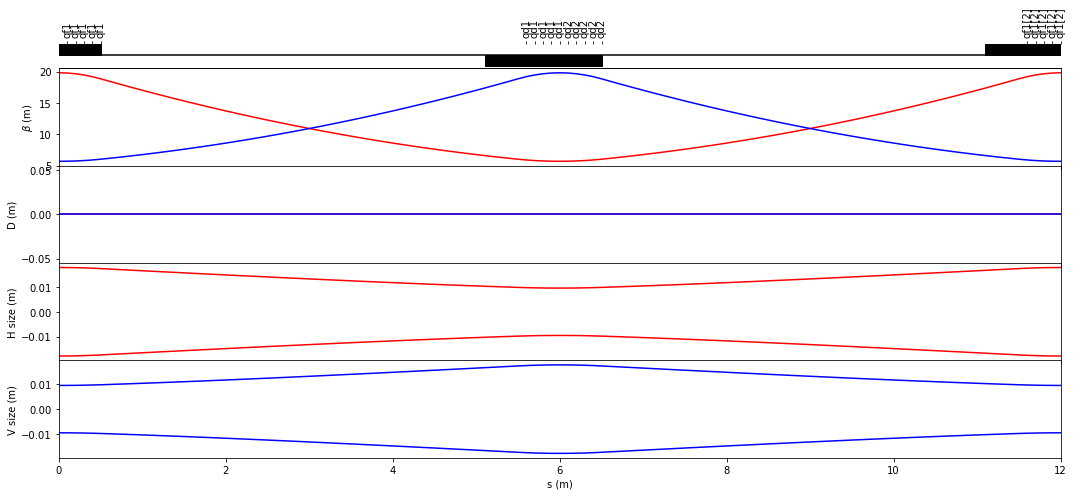

In [115]:
from IPython.core.display import display, HTML, Markdown

display(HTML("<style>.rendered_html { font-size: 17px; }</style>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

def printmd(string):
    display(Markdown(string))

import pandas as pd
import pybt
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import subprocess
from cpymad.madx import Madx

plt.ion()
%matplotlib inline


try:
    import pybt
except:
    !kinit
    !pip install --user git+https://gitlab.cern.ch/abt-optics-and-code-repository/simulation-codes/pybt.git
    import pybt
    
madx = Madx(command_log="commandlog")
madx.beam(particle='proton', pc=3.0)

mqk, mql, length = 0.2, 0.5, 12

madx.command.sequence.clone('S1', l='{:10.6e}'.format(length))

print ('{:10.6e}'.format(length))

madx.elements.marker.clone('s1start', at=0)
madx.command.endsequence()

madx.command.quadrupole.clone('QF', l=mql, k1=mqk)
madx.command.quadrupole.clone('QD', l=mql, k1=-mqk)

madx.command.seqedit(sequence='S1')
madx.command.install(element='QF1', class_='QF', at='{:10.6e}'.format(mql/2))
madx.command.install(element='QD1', class_='QD', at='{:10.6e}'.format(mql+5+mql/2))
madx.command.install(element='QD2', class_='QD', at='{:10.6e}'.format(2*mql+5+mql/2))
madx.command.install(element='QF1', class_='QF', at='{:10.6e}'.format(3*mql+5+5+mql/2))
madx.command.endedit()
               
madx.use(sequence='s1')
#madx.command.match()
madx.select(flag='interpolate', step=0.1)
madx.select(flag='twiss', full=True, column=['N1', 'apertype', 'aper_1', 'aper_2', 'aper_3', 'aper_4', 'apoff_1', 'apoff_2', 'aptol_1', 'aptol_2', 'aptol_3'])
twiss = madx.twiss().dframe()
twiss[['name', 'keyword', 's', 'betx', 'alfx', 'dx', 'dpx', 'bety', 'alfy', 'dy', 'dpy']]

fig = plt.figure(figsize=(15,7))
pybt.tools.plotters.draw_optics({'dx':1e-6,'ex':1e-6, 'ey':1e-6, 'sige':1e-4*0}, twiss, fig, ['quadrupole'])



  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.07.16 16:53:43      +
  ++++++++++++++++++++++++++++++++++++++++++++
1.200000e+01
++++++ info: seqedit - number of elements installed:  5
++++++ info: seqedit - number of elements moved:      0
++++++ info: seqedit - number of elements removed:    0
++++++ info: seqedit - number of elements replaced:   0
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                12                 -0       0.0910331259        3.314364527 

                q1                dq1            betxmax              dxmax 
      0.2909501025      -0.2255305049        14.36014

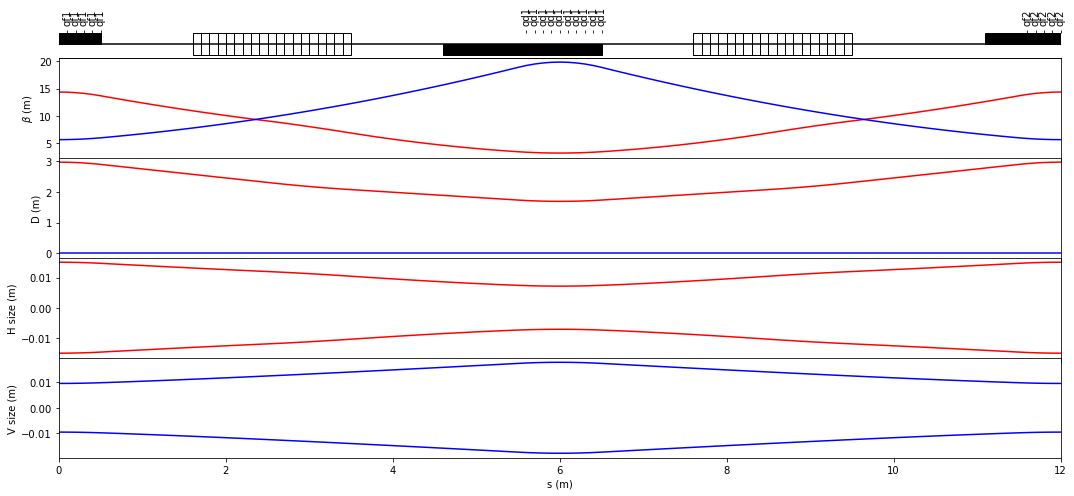

In [114]:
from IPython.core.display import display, HTML, Markdown

display(HTML("<style>.rendered_html { font-size: 17px; }</style>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

def printmd(string):
    display(Markdown(string))

import pandas as pd
import pybt
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import subprocess
from cpymad.madx import Madx

plt.ion()
%matplotlib inline


try:
    import pybt
except:
    !kinit
    !pip install --user git+https://gitlab.cern.ch/abt-optics-and-code-repository/simulation-codes/pybt.git
    import pybt
    
madx = Madx(command_log="commandlog")
madx.beam(particle='proton', pc=3.0)

degree = np.pi/180.0

madx.command.sequence.clone('S1', l='{:10.6e}'.format(length),REFER="ENTRY")

print ('{:10.6e}'.format(length))

#madx.elements.marker.clone('s1start', at=0)
madx.command.endsequence()

madx.command.quadrupole.clone('QF', l=0.5, k1=0.2)
madx.command.quadrupole.clone('QD', l=1.0, k1=-0.2)
madx.command.sbend.clone('B', l=1.0, angle=15*degree) #Ici on rajoute un SBEND, un dipole qui bend le magnet

madx.command.seqedit(sequence='S1')
madx.command.install(element='QF1', class_='QF', at='{:10.6e}'.format(0.0))
madx.command.install(element='B1', class_='B', at='{:10.6e}'.format(2.5))
madx.command.install(element='QD1', class_='QD', at='{:10.6e}'.format(5.5))
madx.command.install(element='B2', class_='B', at='{:10.6e}'.format(8.5))
madx.command.install(element='QF2', class_='QF', at='{:10.6e}'.format(11.5))
madx.command.endedit()
               
madx.use(sequence='s1')
madx.select(flag='interpolate', step=0.1)
madx.select(flag='twiss', full=True, column=['N1', 'apertype', 'aper_1', 'aper_2', 'aper_3', 'aper_4', 'apoff_1', 'apoff_2', 'aptol_1', 'aptol_2', 'aptol_3'])
twiss = madx.twiss().dframe()
twiss[['name', 'keyword', 's', 'betx', 'alfx', 'dx', 'dpx', 'bety', 'alfy', 'dy', 'dpy']]

fig = plt.figure(figsize=(15,7))
pybt.tools.plotters.draw_optics({'dx':1e-6,'ex':1e-6, 'ey':1e-6, 'sige':1e-4*0}, twiss, fig, ['quadrupole']) #On rajoute l'option dx pour plotter la dispersion


In [112]:
madx.quit()

++++++ info: obsolete option 'full'  ignored on 'select'

  Number of warnings: 0

  ++++++++++++++++++++++++++++++++++++++++++++
  +          MAD-X finished normally         +
  ++++++++++++++++++++++++++++++++++++++++++++
